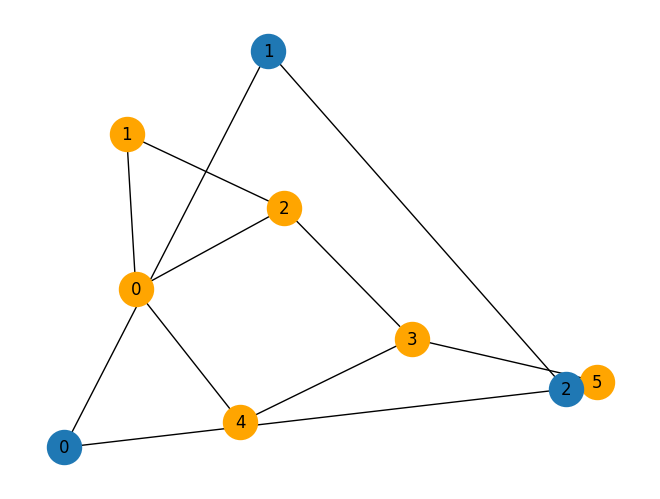

In [1]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np

m = 6
g = rx.PyGraph()
g.add_nodes_from(np.arange(0, m, 1))
e_g_list = [(0, 1, 1.0), (0, 2, 1.0), (0, 4, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0), (3, 5, 1.0)]
g.add_edges_from(e_g_list)
draw_graph(g, node_size=600, with_labels=True, node_color='orange')

n = 3
h = rx.PyGraph()
h.add_nodes_from(np.arange(0, n, 1))
e_h_list = [(0, 1, 1.0), (0, 2, 1.0), (1, 2, 1.0)]
h.add_edges_from(e_h_list)
draw_graph(h, node_size=600, with_labels=True)

# m = 12
# g = rx.PyGraph()
# g.add_nodes_from(np.arange(0, m, 1))
# e_g_list = [(0, 1, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0), (4, 5, 1.0), (5, 6, 1.0), (6, 7, 1.0), (7, 8, 1.0), (8, 9, 1.0), (9, 10, 1.0), (10, 11, 1.0), (11, 0, 1.0)]
# g.add_edges_from(e_g_list)
# draw_graph(g, node_size=600, with_labels=True, node_color='orange')

# n = 2
# h = rx.PyGraph()
# h.add_nodes_from(np.arange(0, n, 1))
# e_h_list = [(0, 1, 1.0)]
# h.add_edges_from(e_h_list)
# draw_graph(h, node_size=600, with_labels=True)

# m = 5
# g = rx.PyGraph()
# g.add_nodes_from(np.arange(0, m, 1))
# e_g_list = [(0, 1, 1.0), (0, 2, 1.0), (0, 4, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0)]
# g.add_edges_from(e_g_list)
# draw_graph(g, node_size=600, with_labels=True, node_color='orange')

# n = 3
# h = rx.PyGraph()
# h.add_nodes_from(np.arange(0, n, 1))
# e_h_list = [(0, 1, 1.0), (0, 2, 1.0)]
# h.add_edges_from(e_h_list)
# draw_graph(h, node_size=600, with_labels=True)

# m = 2
# g = rx.PyGraph()
# g.add_nodes_from(np.arange(0, m, 1))
# e_g_list = [(0, 1, 1.0)]
# g.add_edges_from(e_g_list)
# draw_graph(g, node_size=600, with_labels=True, node_color='orange')

# n = 2
# h = rx.PyGraph()
# h.add_nodes_from(np.arange(0, n, 1))
# e_h_list = [(0, 1, 1.0)]
# h.add_edges_from(e_h_list)
# draw_graph(h, node_size=600, with_labels=True)

In [2]:
e_g = np.zeros((m,m))
for edge in e_g_list:
    e_g[edge[0], edge[1]] = edge[2]
    e_g[edge[1], edge[0]] = edge[2]

e_h = np.zeros((n,n))
for edge in e_h_list:
    e_h[edge[0], edge[1]] = edge[2]
    e_h[edge[1], edge[0]] = edge[2]

print(e_g)
print(e_h)

[[0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


In [3]:
def degree(graph, vertex):
    return np.sum(graph[vertex])

# Constructing Q
Q = np.zeros((m*n, m*n))
for i in range(m):
    for j in range(m):
        for u in range(n):
            for v in range(n):
                Q[i*n+u, j*n+v] = e_g[i, j] * e_h[u, v]

# Adding penalty for attempting to map input to multiple outputs
# See if this can be balanced for weighted graphs

# Add blocks like 0 & -m & -m \\ -m & 0 & -m \\ -m & -m & 0 (if size of H = 3)
for i in range(m):
    start = i*n
    end = (i+1)*n
    for j in range(start, end):
        for k in range(start, end):
            if j != k:
                Q[j, k] -= degree(e_g, i) # penalty of m outweighs the highest possible reward for assigning an input to two outputs
print(Q)

[[ 0. -3. -3.  0.  1.  1.  0.  1.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [-3.  0. -3.  1.  0.  1.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
 [-3. -3.  0.  1.  1.  0.  1.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0. -2. -2.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1. -2.  0. -2.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0. -2. -2.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  1.  1.  0. -3. -3.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  0.  1. -3.  0. -3.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  1.  1.  0. -3. -3.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0. -3. -3.  0.  1.  1.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  1. -3.  0. -3.  1.  0.  1.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0. -3. -3.  0.  1.  1.  0.  1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0. -2. -2.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.

In [4]:
from qiskit.quantum_info import SparsePauliOp

# see https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm
# H_c = sum Q_{ij}Z_iZ_j + sum b_iZ_i

pauli_list = []
for a in range(len(Q)):
    c = 0
    for b in range(len(Q[a])):
        if Q[a, b] != 0:
            paulis = ["I"] * len(Q)
            paulis[a], paulis[b] = "Z", "Z"
            weight = Q[a, b] # should always be 1 for now
            weight *= -1 # -weight to convert from minimizing problem to maximizing
            pauli_list.append(("".join(paulis), weight))

            c -= Q[a, b] + Q[b, a]
    paulis = ["I"] * len(Q)
    paulis[a] = "Z"
    pauli_list.append(("".join(paulis), -c)) # -c to convert from minimizing problem to maximizing
    
print(pauli_list)
cost_hamiltonian = SparsePauliOp.from_list(pauli_list)
print("Cost Function Hamiltonian:", cost_hamiltonian)

[('ZZIIIIIIIIIIIIIIII', 3.0), ('ZIZIIIIIIIIIIIIIII', 3.0), ('ZIIIZIIIIIIIIIIIII', -1.0), ('ZIIIIZIIIIIIIIIIII', -1.0), ('ZIIIIIIZIIIIIIIIII', -1.0), ('ZIIIIIIIZIIIIIIIII', -1.0), ('ZIIIIIIIIIIIIZIIII', -1.0), ('ZIIIIIIIIIIIIIZIII', -1.0), ('ZIIIIIIIIIIIIIIIII', -0.0), ('ZZIIIIIIIIIIIIIIII', 3.0), ('IZZIIIIIIIIIIIIIII', 3.0), ('IZIZIIIIIIIIIIIIII', -1.0), ('IZIIIZIIIIIIIIIIII', -1.0), ('IZIIIIZIIIIIIIIIII', -1.0), ('IZIIIIIIZIIIIIIIII', -1.0), ('IZIIIIIIIIIIZIIIII', -1.0), ('IZIIIIIIIIIIIIZIII', -1.0), ('IZIIIIIIIIIIIIIIII', -0.0), ('ZIZIIIIIIIIIIIIIII', 3.0), ('IZZIIIIIIIIIIIIIII', 3.0), ('IIZZIIIIIIIIIIIIII', -1.0), ('IIZIZIIIIIIIIIIIII', -1.0), ('IIZIIIZIIIIIIIIIII', -1.0), ('IIZIIIIZIIIIIIIIII', -1.0), ('IIZIIIIIIIIIZIIIII', -1.0), ('IIZIIIIIIIIIIZIIII', -1.0), ('IIZIIIIIIIIIIIIIII', -0.0), ('IZIZIIIIIIIIIIIIII', -1.0), ('IIZZIIIIIIIIIIIIII', -1.0), ('IIIZZIIIIIIIIIIIII', 2.0), ('IIIZIZIIIIIIIIIIII', 2.0), ('IIIZIIIZIIIIIIIIII', -1.0), ('IIIZIIIIZIIIIIIIII', -1.0), ('IIIZIIIIIIIIIII

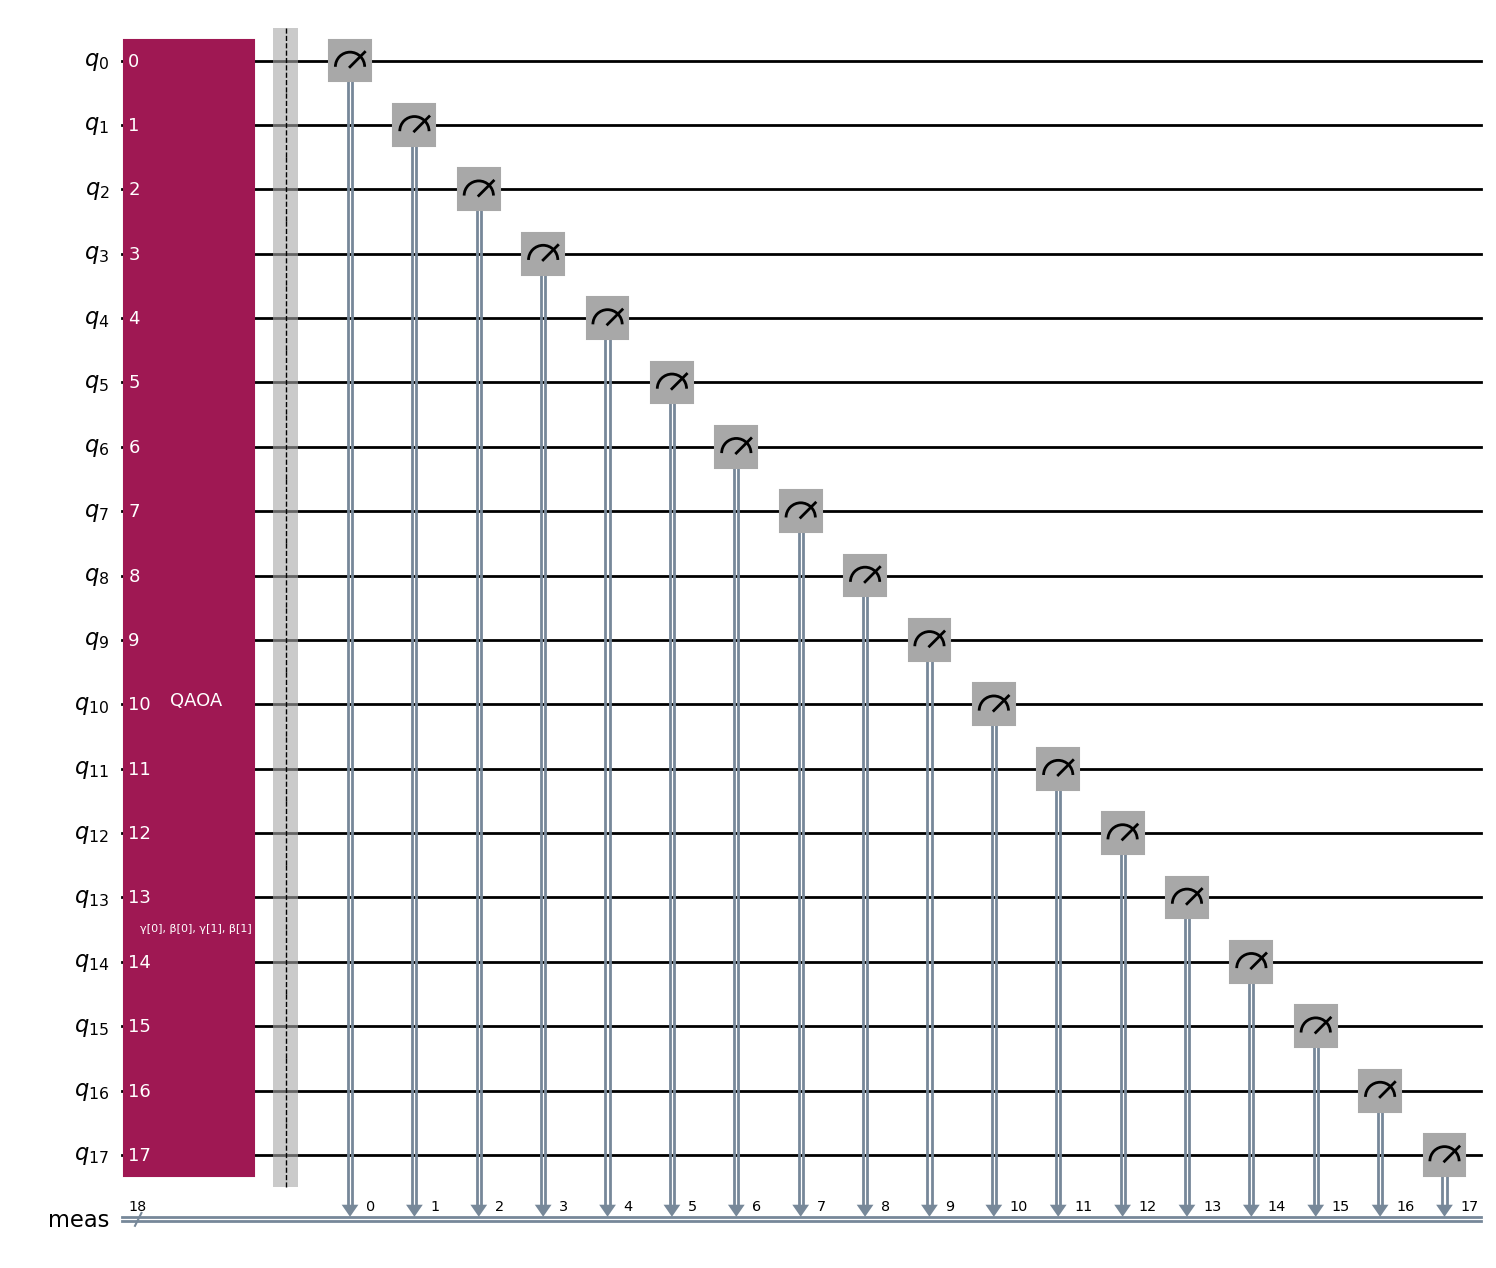

In [5]:
from qiskit.circuit.library import QAOAAnsatz

reps = 2
circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=reps)
circuit.measure_all()

circuit.draw('mpl')
#circuit.parameters

In [6]:
# from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# # QiskitRuntimeService.save_account(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>", overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum')
# backend = service.least_busy(min_num_qubits=127)
# print(backend)

# # Create pass manager for transpilation
# pm = generate_preset_pass_manager(optimization_level=3,
#                                     backend=backend)

# candidate_circuit = pm.run(circuit)
# candidate_circuit.draw('mpl', fold=False, idle_wires=False)

In [7]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

backend = AerSimulator()
print(backend)

# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=backend)

candidate_circuit = pm.run(circuit)
#candidate_circuit.draw('mpl', fold=False, idle_wires=False)

AerSimulator('aer_simulator')


In [8]:
initial_gamma = np.pi
initial_beta = np.pi/2
init_params = [initial_gamma, initial_beta] * reps

In [9]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):

    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)


    return cost

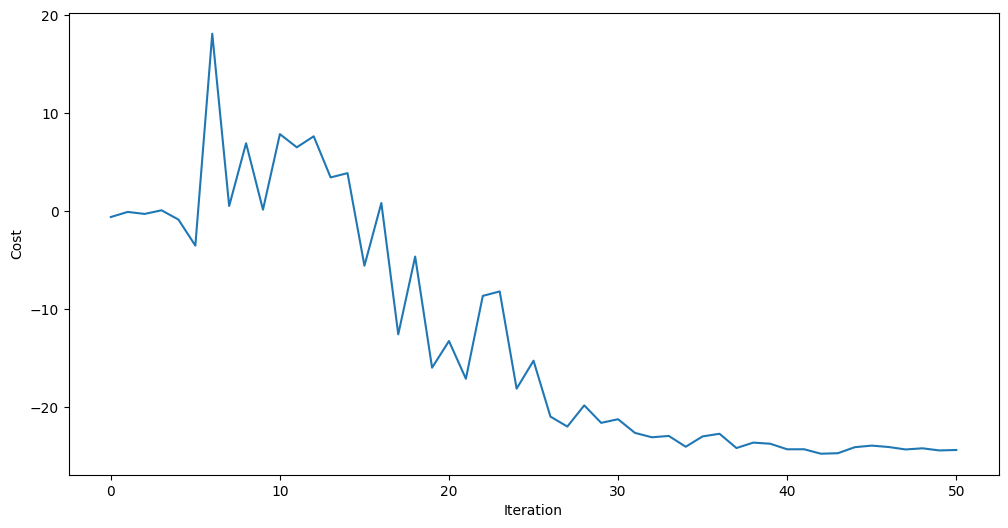

In [10]:
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from scipy.optimize import minimize
import matplotlib.pyplot as plt

objective_func_vals = [] # Global variable
with Session(backend=backend) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
    estimator = Estimator(mode=session)
    # estimator.options.default_shots = 1000

    # Set simple error suppression/mitigation options
    # estimator.options.dynamical_decoupling.enable = True
    # estimator.options.dynamical_decoupling.sequence_type = "XY4"
    # estimator.options.twirling.enable_gates = True
    # estimator.options.twirling.num_randomizations = "auto"

    result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, cost_hamiltonian, estimator),
        method="COBYLA",
        tol=1e-3,
    )
    #print(result)

plt.figure(figsize=(12, 6))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [11]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
#optimized_circuit.draw('mpl', fold=False, idle_wires=False)

In [12]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10000

# Set simple error suppression/mitigation options
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"
sampler.options.twirling.enable_gates = True
sampler.options.twirling.num_randomizations = "auto"

pub= (optimized_circuit, )
job = sampler.run([pub], shots=int(1e4))
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin = {key: val/shots for key, val in counts_bin.items()}
print(final_distribution_int)

/home/cab3/code/cmsc320/.venv/lib/python3.8/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:268: UserWarning: Options {'dynamical_decoupling': {'enable': True, 'sequence_type': 'XY4'}, 'twirling': {'enable_gates': True, 'num_randomizations': 'auto'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


{94873: 0.0001, 79580: 0.0001, 62189: 0.0001, 214475: 0.0001, 223524: 0.0001, 131698: 0.0001, 194394: 0.0001, 58099: 0.0001, 85296: 0.0001, 237807: 0.0001, 9024: 0.0001, 169821: 0.0001, 205737: 0.0002, 58017: 0.0001, 39190: 0.0002, 89007: 0.0001, 58214: 0.0002, 182140: 0.0001, 136469: 0.0001, 76454: 0.0001, 86693: 0.0001, 114027: 0.0001, 179311: 0.0001, 74453: 0.0001, 257435: 0.0001, 82715: 0.0002, 201877: 0.0001, 90979: 0.0001, 113820: 0.0001, 224157: 0.0001, 72105: 0.0002, 218189: 0.0001, 158603: 0.0002, 71976: 0.0001, 125554: 0.0001, 192267: 0.0001, 54453: 0.0001, 72000: 0.0001, 114011: 0.0001, 181915: 0.0001, 141584: 0.0003, 149673: 0.0001, 83629: 0.0003, 206913: 0.0001, 189403: 0.0001, 149401: 0.0001, 50534: 0.0001, 146017: 0.0001, 223010: 0.0001, 126710: 0.0001, 152178: 0.0001, 153509: 0.0002, 125739: 0.0004, 87141: 0.0001, 63931: 0.0001, 50933: 0.0001, 170222: 0.0001, 148235: 0.0001, 194425: 0.0001, 210077: 0.0001, 27148: 0.0001, 40104: 0.0001, 117683: 0.0001, 5209: 0.0001, 7073

In [13]:
top_n = 5

def to_bitstring(integer, num_bits):
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())
most_likely = [keys[i] for i in np.argsort(np.abs(values))][-top_n:]
most_likely_bitstring = [to_bitstring(key, len(Q))[::-1] for key in most_likely]

most_likely2 = np.argmax(np.abs(values))

for bit_string in most_likely_bitstring:
    print("Bitstring: ", bit_string)

Bitstring:  [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]
Bitstring:  [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
Bitstring:  [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1]
Bitstring:  [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
Bitstring:  [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0]


In [14]:
hom = np.zeros((top_n, m, n))
for k in range(top_n):
    for i in range(m):
        for j in range(n):
            hom[k][i, j] = most_likely_bitstring[k][i*n + j]
hom

array([[[1., 0., 0.],
        [1., 1., 0.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]],

       [[1., 1., 0.],
        [1., 0., 1.],
        [0., 0., 1.],
        [1., 0., 1.],
        [0., 1., 1.],
        [1., 1., 0.]],

       [[0., 1., 0.],
        [0., 1., 1.],
        [1., 0., 1.],
        [0., 1., 1.],
        [1., 1., 0.],
        [1., 0., 1.]],

       [[0., 0., 1.],
        [0., 0., 0.],
        [1., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       [[1., 0., 0.],
        [0., 1., 1.],
        [1., 0., 0.],
        [0., 1., 1.],
        [0., 1., 1.],
        [1., 0., 0.]]])

In [15]:
def first_nonzero(array):
    for i in range(len(array)):
        if array[i] != 0:
            return i
    return -1

def edge_in_graph(g, tup):
    return g[tup[0]][tup[1]]

def edge_across_hom(hom, v1, v2):
    return (first_nonzero(hom[v1]), first_nonzero(hom[v2]))

print(f'G:\n{e_g}')
print(f'H:\n{e_h}')

max = 0
max_index = 0
for h in range(len(hom)):
    total = 0
    for i in range(len(hom[h])):
        for j in range(len(hom[h][i])):
            total += edge_in_graph(e_g, (i,j)) * edge_in_graph(e_h, edge_across_hom(hom[h], i, j))
    print(f'Value: {total}')
    if total > max:
        max = total
        max_index = h

print(f'Best hom ({max}):\n{hom[max_index]}')

G:
[[0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
H:
[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]
Value: 6.0
Value: 6.0
Value: 6.0
Value: 5.0
Value: 6.0
Best hom (6.0):
[[1. 0. 0.]
 [1. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
